In [1]:
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import visualkeras
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

2024-10-17 16:33:08.142163: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-17 16:33:08.160515: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 16:33:08.160531: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 16:33:08.161051: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 16:33:08.164195: I tensorflow/core/platform/cpu_feature_guar

In [2]:
X = np.zeros((20000, 180, 1))

In [52]:
x_input = keras.Input(X.shape[1:])
x = x_input
x = keras.layers.Conv1D(64, 5, padding="same", activation='relu')(x)
x = keras.layers.MaxPooling1D()(x)
x = keras.layers.Conv1D(32, 5, padding="same", activation='relu')(x)
x = keras.layers.MaxPooling1D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(3, activation='softmax')(x)
model = keras.Model(x_input, x)

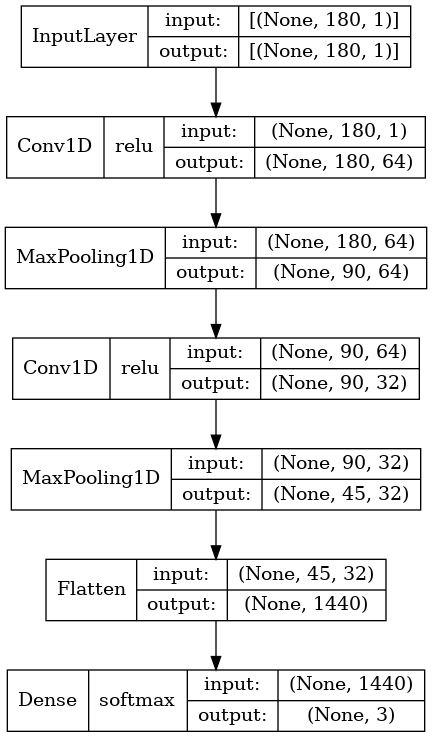

In [53]:
# keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=False, show_layer_activations=True)
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False, show_layer_activations=True)

/home/simul6/anaconda3/envs/eugenio/lib/python3.11/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


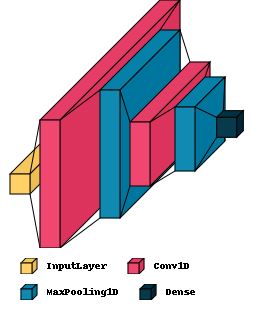

In [54]:
visualkeras.layered_view(model, type_ignore=[keras.layers.Flatten], scale_xy=2, scale_z=0.3, legend=True, draw_volume=True)
# visualkeras.graph_view(model)